# 1. Data loading and cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import time
import csv
import lifetimes

In [2]:
Retail = pd.read_excel('/Users/Denike/Downloads/SHU Courses/Final Graduate Project/online_retail_III.xlsx')

In [3]:
Retail.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [4]:
Retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
Retail.shape

(525461, 8)

In [6]:
#Extracting month and time from InvoiceDate and creating new columns for both 
import datetime
import calendar
Retail['Month'] = pd.DatetimeIndex(Retail['InvoiceDate']).month
Retail['Time'] = pd.DatetimeIndex(Retail['InvoiceDate']).time
Retail['Month'] = Retail['InvoiceDate'].dt.month_name()
Retail.head

<bound method NDFrame.head of        Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931               JUMBO STORAGE BAG SUKI         2   

               InvoiceDate  Price  Customer ID         Country     Mo

In [7]:
Retail.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
Month                  object
Time                   object
dtype: object

In [8]:
#viewing rows with Null values
Retail.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
Month               0
Time                0
dtype: int64

In [9]:
#Dropping rows with Null values
df=pd.DataFrame(Retail)
retail_stores=df.dropna()
print(retail_stores)

       Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931               JUMBO STORAGE BAG SUKI         2   

               InvoiceDate  Price  Customer ID         Country     Month  \
0      2009-12-01 07:45

In [10]:
retail_stores.describe()

,Quantity,Price,Customer ID
count,417534.000000,417534.000000,417534.000000
mean,12.758815,3.887547,15360.645478
std,101.220424,71.131797,1680.811316
min,-9360.000000,0.000000,12346.000000
25%,2.000000,1.250000,13983.000000
50%,4.000000,1.950000,15311.000000
75%,12.000000,3.750000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [11]:
retail_stores.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Month', 'Time'],
      dtype='object')

In [12]:
#Create a new column called TotalPrice
retail_stores = Retail.astype({"Quantity":'float'})
retail_stores['TotalPrice']=retail_stores['Quantity']*retail_stores['Price']
retail_stores

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Month,Time,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,December,07:45:00,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,December,07:45:00,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,December,07:45:00,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,December,07:45:00,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,December,07:45:00,30.00
...,...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2.0,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,December,20:01:00,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1.0,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,December,20:01:00,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1.0,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,December,20:01:00,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2.0,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,December,20:01:00,7.50


# 2. Data Exploration

In [13]:
#Number of unique products 
retail_stores.Description.nunique()

4681

In [14]:
#total Revenue made for the given period
Sum_revenue=retail_stores.TotalPrice.sum()
print ('Total Sales:\n','$ ', round(Sum_revenue,2))

Total Sales:
 $  9539484.63


In [15]:
#product that sold highest quantity in a single sale
retail_stores['Quantity'].max()

19152.0

In [16]:
#Average quantity of sales per day 
retail_stores['Quantity'].mean()

10.337667305470815

In [17]:
#Top countries by sales
top_countries=retail_stores.groupby(["Country"])['TotalPrice'].sum().sort_values(ascending=False)
top_countries=top_countries.to_frame()
top_countries.head(10)

,TotalPrice
Country,
United Kingdom,8.194778e+06
EIRE,3.522427e+05
Netherlands,2.638634e+05
Germany,1.962904e+05
France,1.307699e+05
Sweden,5.121351e+04
Denmark,4.697295e+04
Switzerland,4.334341e+04
Spain,3.708490e+04


##### Which Countries had the largest number in sales? 
The Top Selling country is United Kingdom with over $8M in sales

In [18]:
#Best selling product by quantity
top_products=retail_stores.groupby(["Description"])[['TotalPrice', 'Quantity']].sum().sort_values(by="Quantity", ascending=False,)
plt.savefig('top_products.png')
top_products.head()

,TotalPrice,Quantity
Description,,
WHITE HANGING HEART T-LIGHT HOLDER,157865.43,57733.0
WORLD WAR 2 GLIDERS ASSTD DESIGNS,11310.29,54698.0
BROCADE RING PURSE,8879.82,47647.0
PACK OF 72 RETRO SPOT CAKE CASES,23759.26,46106.0
ASSORTED COLOUR BIRD ORNAMENT,72454.12,44925.0


<Figure size 432x288 with 0 Axes>

##### What is our best selling product?
Our best selling product is the White hanging Heart T-Light Holder , it sold 57,733 pieces and generated $157,865

In [19]:
#Best selling product by revenue
top_products=retail_stores.groupby(["Description"])[['TotalPrice', 'Quantity']].sum().sort_values(by="TotalPrice", ascending=False,)
top_products.head(10)

,TotalPrice,Quantity
Description,,
REGENCY CAKESTAND 3 TIER,163051.46,13093.0
WHITE HANGING HEART T-LIGHT HOLDER,157865.43,57733.0
DOTCOM POSTAGE,116401.99,731.0
ASSORTED COLOUR BIRD ORNAMENT,72454.12,44925.0
PAPER CHAIN KIT 50'S CHRISTMAS,57870.20,17083.0
JUMBO BAG RED RETROSPOT,56444.61,30727.0
PARTY BUNTING,49645.52,10088.0
ROTATING SILVER ANGELS T-LIGHT HLDR,47672.49,13675.0
POSTAGE,46092.36,2154.0


###### What is our highest grossing  product?
Our highest grossing product is the Regency Cakestand which sold 13,093 pieces but generated $163,051

In [20]:
#Most sales by the hour (applicable to e-commerce)
top_time=retail_stores.groupby(["Time"])['TotalPrice'].sum().sort_values(ascending=False)
top_time=top_time.to_frame()
top_time

,TotalPrice
Time,
16:02:00,67594.05
16:45:00,63098.05
12:34:00,62239.45
09:46:00,61764.16
11:36:00,58172.32
...,...
15:04:00,-5170.00
16:52:00,-15673.65
12:04:00,-24155.04


##### When is the most appropriate time to display advertising to maximize the likelihood of customers buying the products?
Total sales is maximum and minimum at these times   
Best Time 4:02PM   
Worst Time 1:36PM 

In [21]:
top_month=retail_stores.groupby(["Month"])['TotalPrice'].sum().sort_values(ascending=False)
top_month=top_month.to_frame()
top_month.head(12)

,TotalPrice
Month,
November,1422654.642
December,1177335.560
October,1045168.350
September,853650.431
March,765848.761
June,679786.610
August,656776.340
January,624032.892
May,615322.830


###### What was the best and worst months of sales and how much did we make?
Best total sales by month- November - $1,422,654   

Worst total Sale by month - February - $533,091


## 3. RFM Modelling and Analysis

In [22]:
#Using Recency, Frequency and Monetary Model
retail_stores['InvoiceDate'].min(),retail_stores['InvoiceDate'].max()
PRESENT = dt.datetime(2011,12,10)
retail_stores['InvoiceDate'] = pd.to_datetime(retail_stores['InvoiceDate'])
retail_stores.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Month,Time,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,December,07:45:00,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,December,07:45:00,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,December,07:45:00,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,December,07:45:00,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,December,07:45:00,30.0


In [23]:
##For Recency, this is calculated by the number of days between present date and date of last purchase each customer.
#For Frequency, this is calculated by the number of orders for each customer
#For Monetary, calculate sum of purchase price for each customer
rfm= retail_stores.groupby('Customer ID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'Invoice': lambda num: len(num),
                                        'TotalPrice': lambda price: price.sum()})

In [24]:
rfm.columns

Index(['InvoiceDate', 'Invoice', 'TotalPrice'], dtype='object')

In [25]:
rfm.columns=['monetary','frequency','recency']
rfm['recency'] = rfm['recency'].astype(int)
rfm.head()

,monetary,frequency,recency
Customer ID,,,
12346.0,431,46,-64
12347.0,367,71,1323
12348.0,438,20,222
12349.0,407,107,2646
12351.0,375,21,300


In [26]:
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, ['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])
rfm.head()

,monetary,frequency,recency,r_quartile,f_quartile,m_quartile
Customer ID,,,,,,
12346.0,431,46,-64,1,2,2
12347.0,367,71,1323,3,2,4
12348.0,438,20,222,1,3,2
12349.0,407,107,2646,4,1,3
12351.0,375,21,300,2,3,4


In [27]:
# Filter out Top/Best cusotmers by RFM_group is 111 but there are no 111 
rfm['RFM_Group'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,monetary,frequency,recency,r_quartile,f_quartile,m_quartile,RFM_Group
Customer ID,,,,,,,
12346.0,431,46,-64,1,2,2,122
12347.0,367,71,1323,3,2,4,324
12348.0,438,20,222,1,3,2,132
12349.0,407,107,2646,4,1,3,413
12351.0,375,21,300,2,3,4,234


In [28]:
#Create another column for the RFMScore
#The best scores/customers are the lower numbers , the lower the better i.e 4,5,6 etc 
rfm ['RFMScore']= rfm.r_quartile.astype(int)+ rfm.f_quartile.astype(int) + rfm.m_quartile.astype(int)
rfm.head(10)

,monetary,frequency,recency,r_quartile,f_quartile,m_quartile,RFM_Group,RFMScore
Customer ID,,,,,,,,
12346.0,431,46,-64,1,2,2,122,5
12347.0,367,71,1323,3,2,4,324,9
12348.0,438,20,222,1,3,2,132,6
12349.0,407,107,2646,4,1,3,413,8
12351.0,375,21,300,2,3,4,234,9
12352.0,375,18,343,2,4,4,244,10
12353.0,408,20,317,2,3,3,233,8
12355.0,567,22,488,2,3,1,231,6
12356.0,380,84,3562,4,2,4,424,10


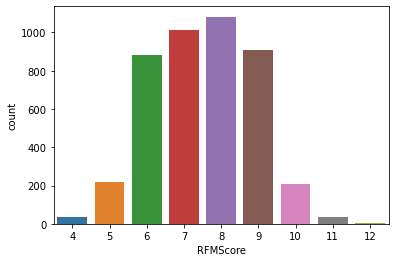

In [29]:
#from the plot, the majority of the customers are between scores 6 and 9
sns.countplot(rfm['RFMScore'])
plt.show()

In [30]:
def handel_badge(value):
    if(value>=10):
        return 'Bronze'
    elif(value>=8 and value<10):
        return 'Silver'
    elif(value>=6 and value<8):
        return 'Gold'
    else:
        return 'Platinum'

# Storing all the values in a list   
Segments=rfm['RFMScore'].apply(handel_badge)

In [31]:
Segments

Customer ID
12346.0    Platinum
12347.0      Silver
12348.0        Gold
12349.0      Silver
12351.0      Silver
             ...   
18283.0        Gold
18284.0        Gold
18285.0        Gold
18286.0        Gold
18287.0      Silver
Name: RFMScore, Length: 4383, dtype: object

In [32]:
rfm['RFM_Loyalty_Level']=Segments

In [33]:
rfm.reset_index().head()

,Customer ID,monetary,frequency,recency,r_quartile,f_quartile,m_quartile,RFM_Group,RFMScore,RFM_Loyalty_Level
0,12346.0,431,46,-64,1,2,2,122,5,Platinum
1,12347.0,367,71,1323,3,2,4,324,9,Silver
2,12348.0,438,20,222,1,3,2,132,6,Gold
3,12349.0,407,107,2646,4,1,3,413,8,Silver
4,12351.0,375,21,300,2,3,4,234,9,Silver


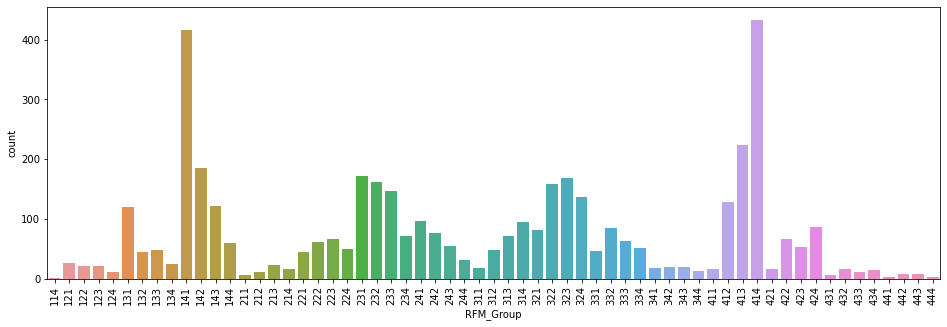

In [35]:
#Distribution of the RFM_Group
df2=rfm['RFM_Group'].sort_values(ascending=True)
plt.figure(figsize=(16,5))
sns.countplot(df2)
plt.xticks(rotation=90)
plt.show()

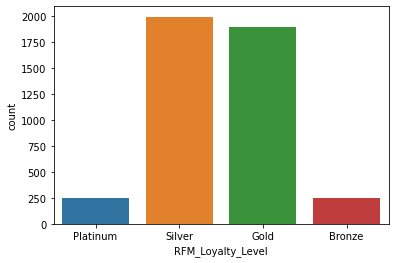

In [36]:
sns.countplot(rfm['RFM_Loyalty_Level'])
plt.show()